In [143]:
#import hylleraas.sunmat as sm  
import sunmat as sm
import numpy as np
import matplotlib.pyplot as plt

## Boltzmann-weighted unitary rotations

The special orthogonal $\text{n}$ by $\text{n}$ ( $\text{SO(n)}$ ) matrix which mixes between the ground state $\vert 0 \rangle$ and the excited space $\{ \vert a \rangle \}_{ 1<a}^N$ may be expressed by:
\begin{equation}
\tilde{U}(\{\theta\}) = 
    \mathbb{1}
    \prod_{1 < a}^N \Big{(}
    \vert 0 \rangle \text{cos}(\theta_{0a}) \langle 0 \vert -
    \vert a \rangle \text{sin}(\theta_{0a}) \langle 0 \vert +
    \vert 0 \rangle \text{sin}(\theta_{0a}) \langle q \vert +
    \vert a \rangle \text{cos}(\theta_{0a}) \langle q \vert
    \Big{)},
\end{equation}
where the angles $\{ \theta_{0a} \}$ rotates between the ground state and excited state $\vert a \rangle$. (The identity matrix $\mathbb{1}$ is required in order to avoid removal of the ground state when performing the rotation.)

These kinds of matrices can be parameterized by means of the sunmat-module, which is to be included on the <a href="https://gitlab.com/hylleraasplatform/hylleraas">Hylleraas Software Platform</a>.  

See <a href="https://github.com/audunsh/sunmat/blob/master/suNmat_tutorial.ipynb">github/audunsh</a> for further documentation on the sunmat module.

The rotations may be performed weighted by a Boltzmann weighted distribution in the following manner:

In [169]:
n_states = 10 #number of (plane wave) states in total 

groundstate = [0]  # this state is to be mixed...
excited_states = np.arange(1,n_states) # ...with all of these

eigenvalues = np.cumsum(np.random.uniform(0,1,n_states)) # mock eigenvalues


nx, U = sm.suNia(n_states,groundstate,excited_states) # parameterized mixing matrix

In [170]:
U(np.zeros(n_states)) # no rotation SO(n), should be identity

array([[ 1., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [ 0.,  1., -0., -0., -0., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  1., -0., -0., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  1., -0., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  1., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [171]:
stepsize = 1 # adjust maximum rotation

probabilities = np.exp(-eigenvalues)/np.sum(np.exp(-eigenvalues)) #mock Boltzmann probablites, sums to one

params = probabilities*np.random.uniform(-1,1,n_states)*stepsize # random parameters weighted by the Boltzmann distributin

u_random = U(params) #the random rotation matrix, mixing the ground state with the excited space

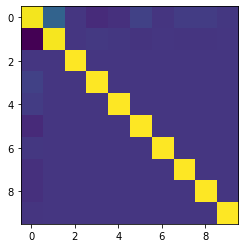

In [173]:
# Visual inspection of the rotation matrix
plt.imshow(u_random)
plt.show()

In [174]:
# Make sure ux(params) is orthogonal

print("ux is orthogonal:", np.linalg.norm(u_random.T.dot(u_random) - np.eye(n_states) ) <1e-15)

ux is orthogonal: True
